# Diabetes regression 2

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

Read diabetes_dirty.csv into your Jupyter Notebook.

In [2]:
# Read the dataset
data = pd.read_csv('diabetes_dirty.csv')

# Display the first few rows of the dataset
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


The diabetes_dirty.csv aims to predict a person’s progression in the condition with respect to various attributes about them.

In [3]:
# Display dataset information
data.info()

# Check for missing values
data.isnull().sum()

# Basic statistics of the dataset
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          442 non-null    int64  
 1   SEX          442 non-null    int64  
 2   BMI          442 non-null    float64
 3   BP           442 non-null    float64
 4   S1           442 non-null    int64  
 5   S2           442 non-null    float64
 6   S3           442 non-null    float64
 7   S4           442 non-null    float64
 8   S5           442 non-null    float64
 9   S6           442 non-null    int64  
 10  PROGRESSION  442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


array([[<Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'SEX'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'BP'}>, <Axes: title={'center': 'S1'}>,
        <Axes: title={'center': 'S2'}>],
       [<Axes: title={'center': 'S3'}>, <Axes: title={'center': 'S4'}>,
        <Axes: title={'center': 'S5'}>],
       [<Axes: title={'center': 'S6'}>,
        <Axes: title={'center': 'PROGRESSION'}>, <Axes: >]], dtype=object)

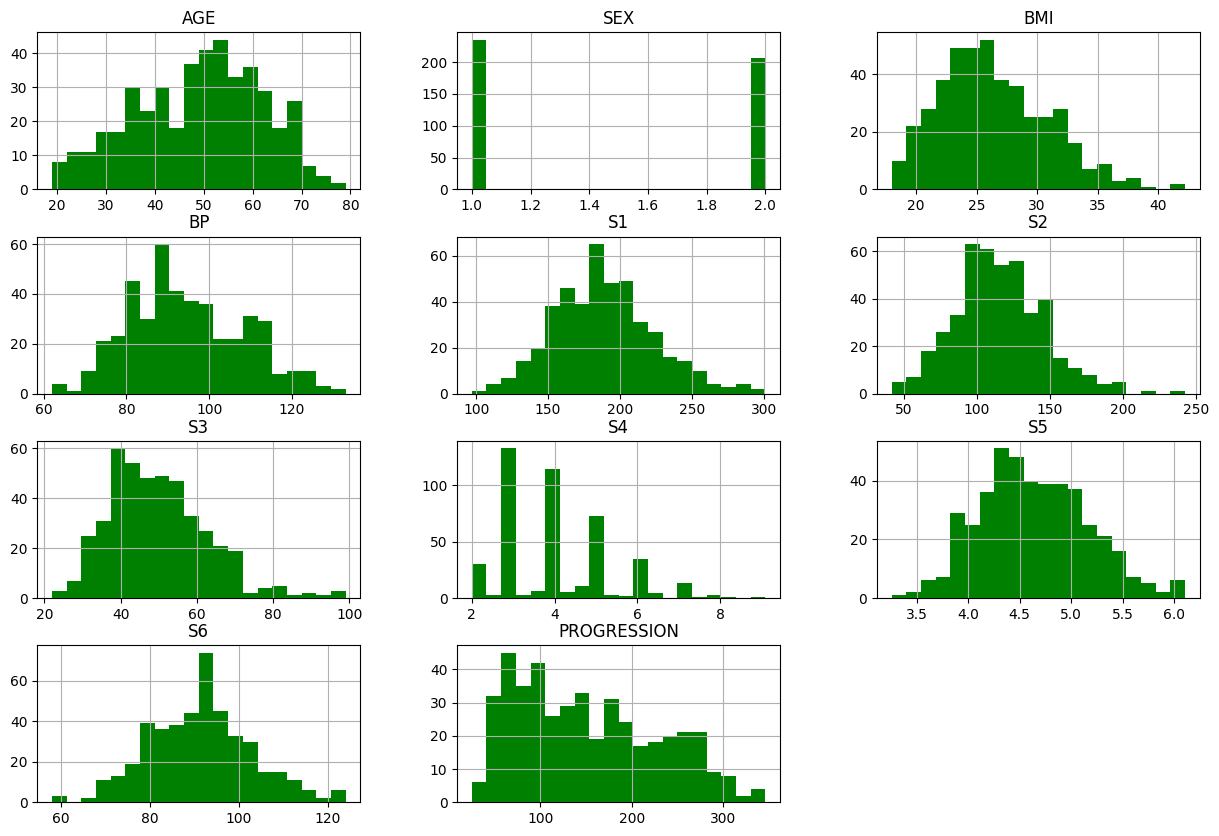

In [4]:
# Data visualization
data.hist(figsize=(15,10),bins=20,color='green')

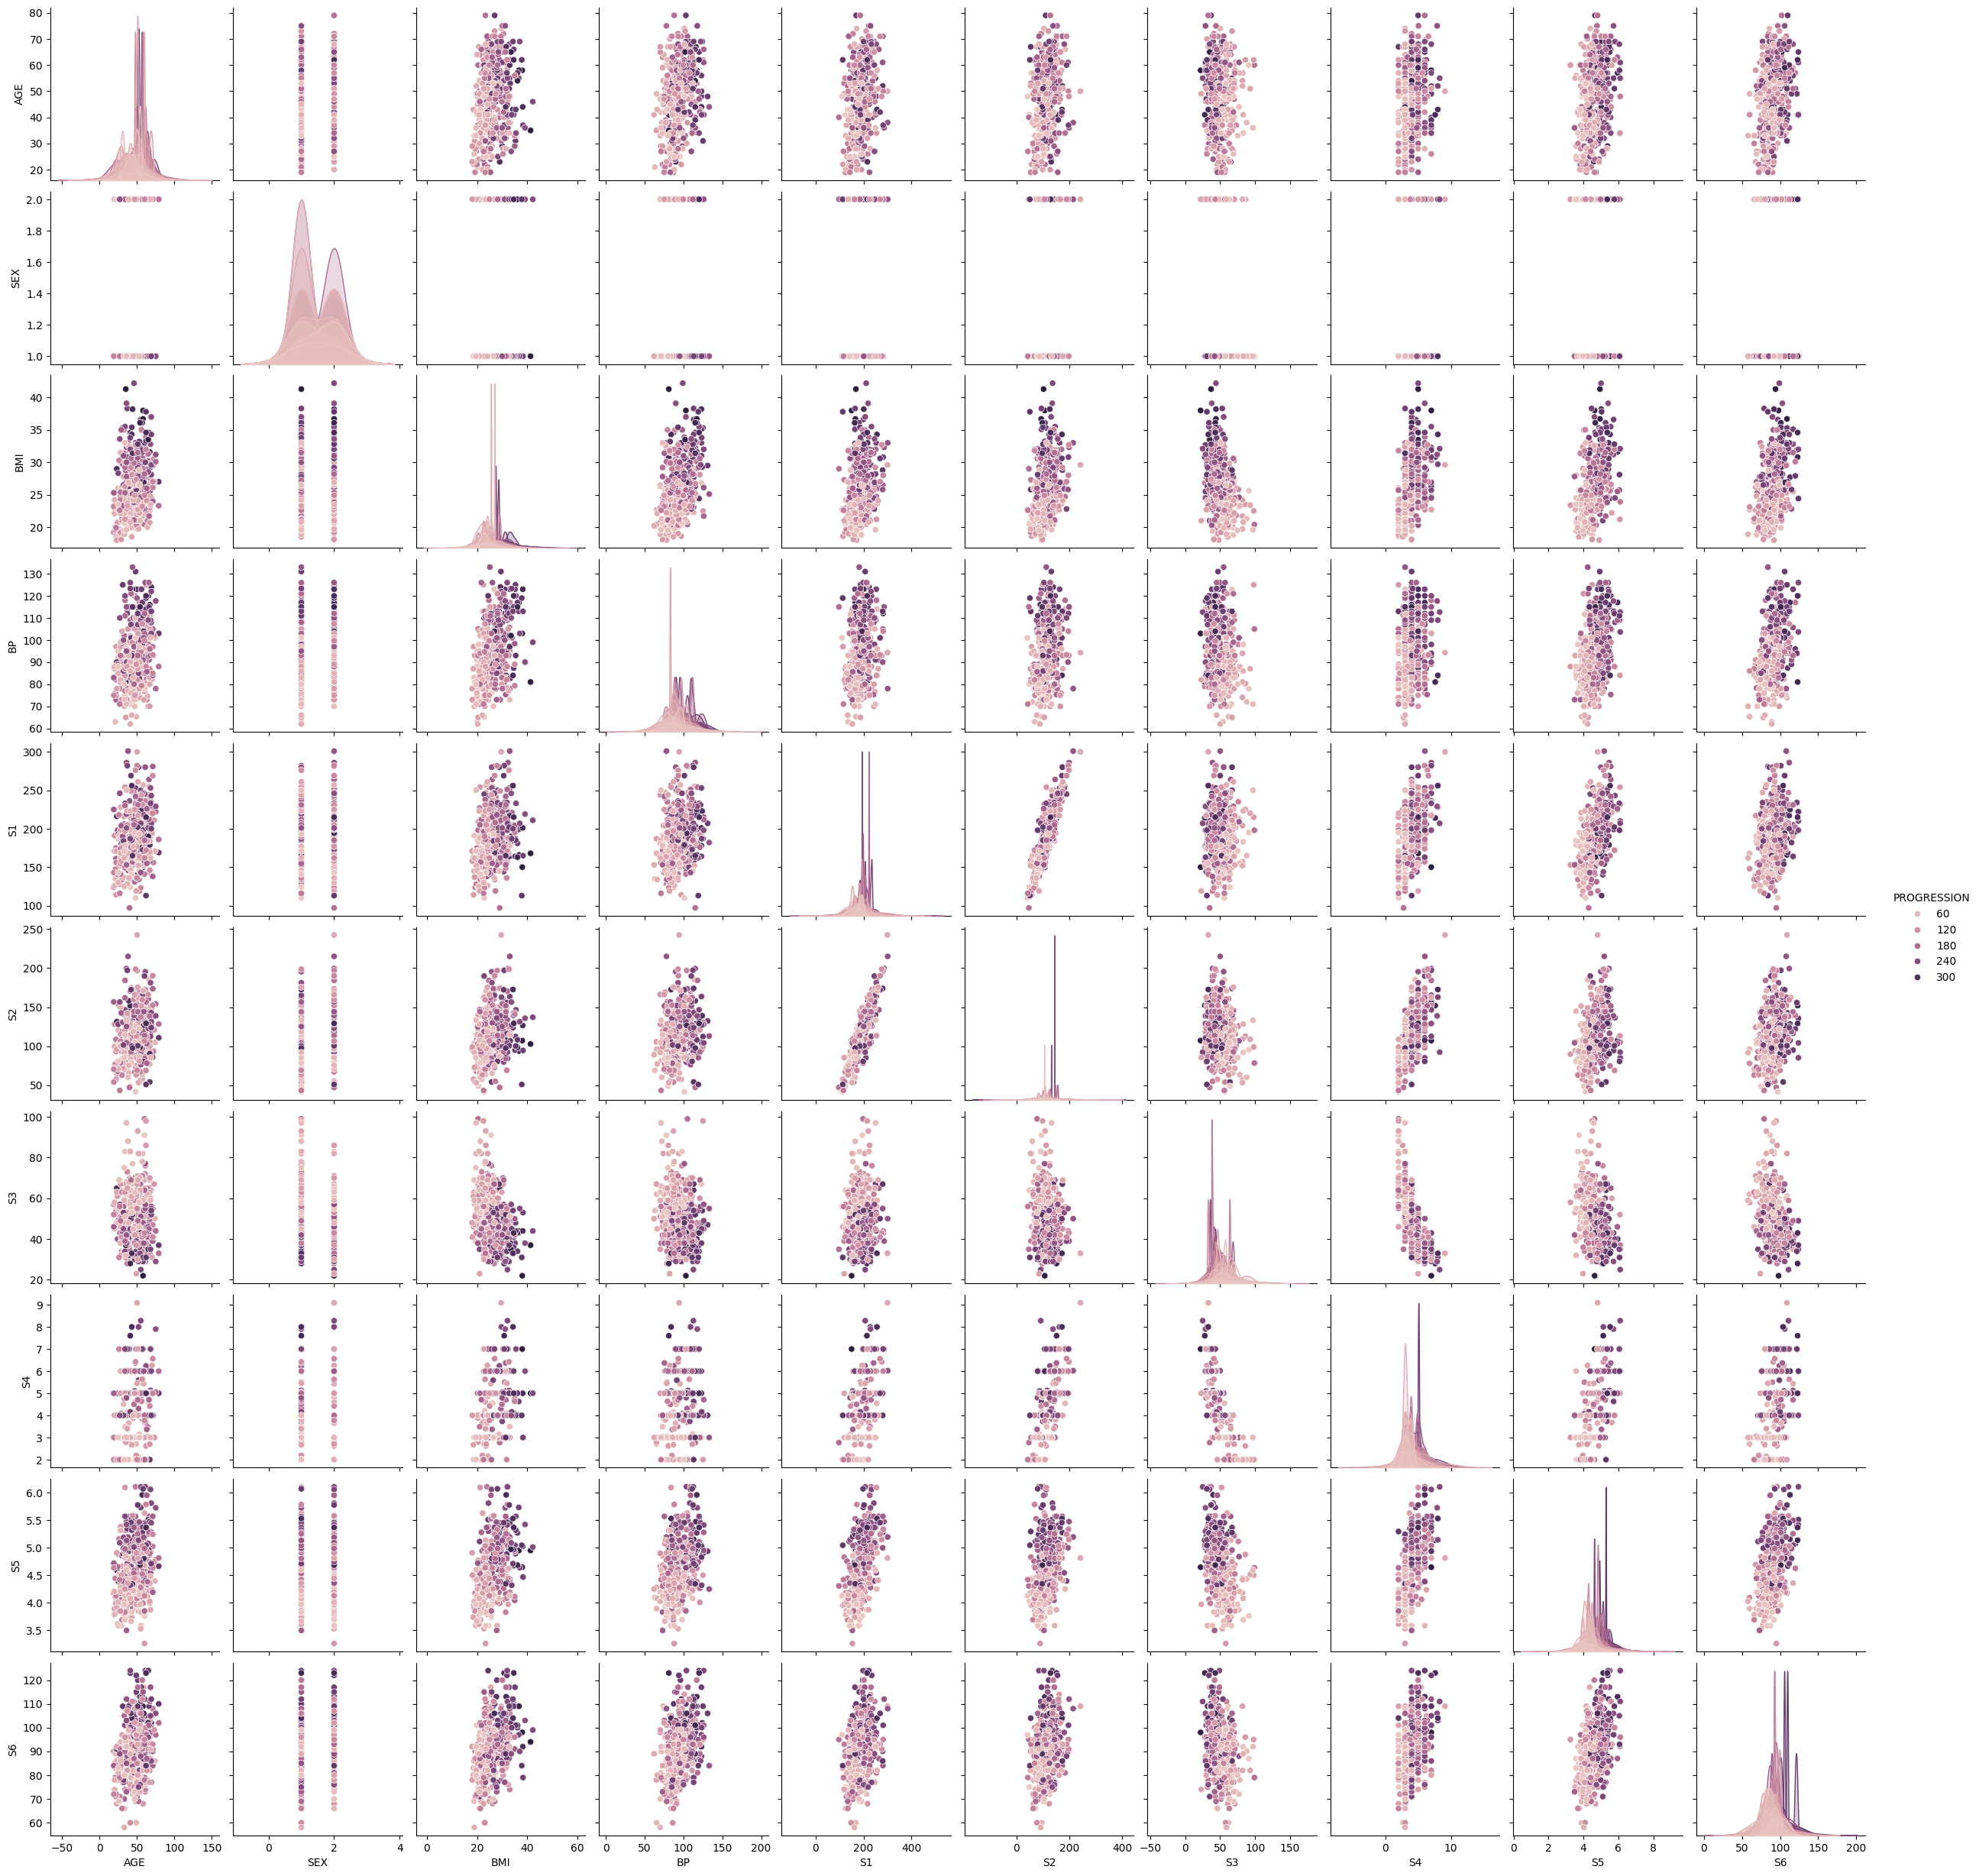

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [5]:
# to understand the relation between the different columns (features) in the dataset:
sns.pairplot(data,hue='PROGRESSION')
plt.show()
# Correlation matrix
correlation=data.corr()
correlation

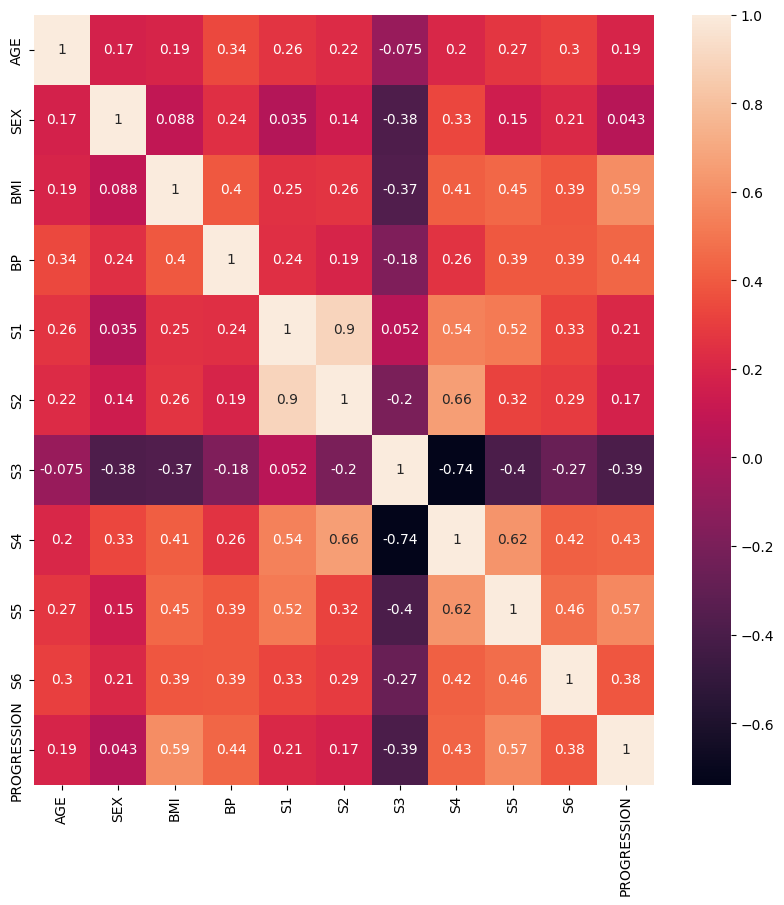

In [6]:
# Heatmap to find the correlation between the variables
fig = plt.figure(figsize = (10,10)) 
sns.heatmap(data.corr(), annot = True)
plt.show()

In [7]:
# From the scatter plots
cor = data.corr(method ='pearson')
cor

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,PROGRESSION
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


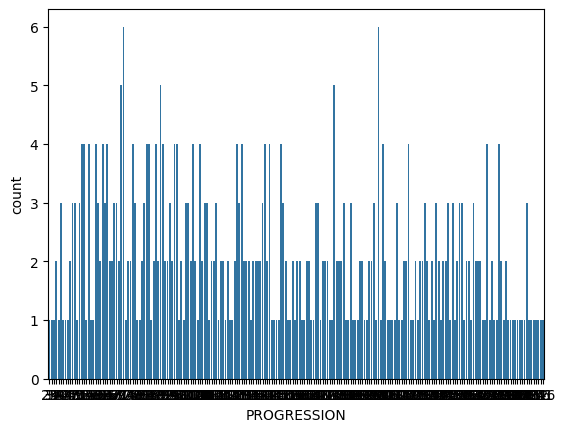

PROGRESSION
200    6
72     6
90     5
178    5
71     5
      ..
73     1
222    1
86     1
79     1
57     1
Name: count, Length: 214, dtype: int64


In [8]:
# Visualization count of PROGRESSION
sns.countplot(x = 'PROGRESSION', data=data)
plt.show()
print(data.PROGRESSION.value_counts())

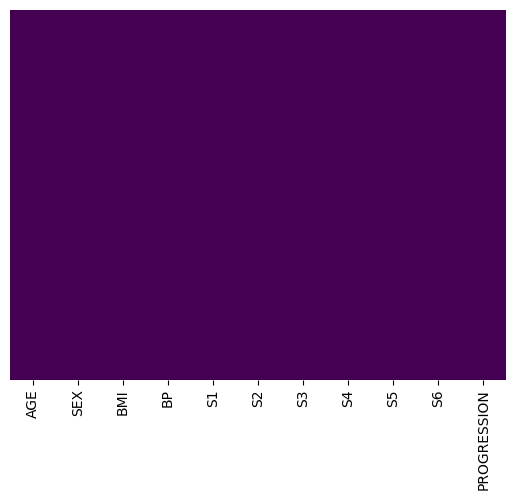

In [9]:
# Visualization of missing data
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

Differentiate between the independent variables and the dependent variable, and assign them to variables X and Y.

In [10]:
# Independent variables
X = data.drop('PROGRESSION', axis=1)

In [11]:
# Dependent variable
Y = data['PROGRESSION']

Generate training and test sets comprising 80% and 20% of the data respectively.

In [12]:
# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
# Display the shapes of the training and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (353, 10)
X_test shape: (89, 10)
Y_train shape: (353,)
Y_test shape: (89,)


 Investigate the necessity for scaling or normalization of the data. Employ MinMaxScaler and StandardScaler if necessary. Fit these scalers on the training set and apply the fitted scalers to transform both the training and test sets accordingly.

In [14]:
# Check for the necessity of scaling by examining the statistics
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,353.0,48.915014,12.755285,19.0000,40.0000,51.0000,59.0000,79.000
SEX,353.0,1.470255,0.499823,1.0000,1.0000,1.0000,2.0000,2.000
BMI,353.0,26.536827,4.386226,18.1000,23.4000,25.9000,29.4000,41.300
BP,353.0,94.989575,14.078076,62.0000,84.0000,93.0000,105.0000,133.000
S1,353.0,188.736544,34.729249,110.0000,163.0000,186.0000,208.0000,301.000
S2,353.0,114.924363,30.420845,41.6000,94.6000,112.8000,132.8000,242.400
S3,353.0,49.519830,12.777917,22.0000,41.0000,48.0000,57.0000,99.000
S4,353.0,4.080453,1.295082,2.0000,3.0000,4.0000,5.0000,9.090
S5,353.0,4.654751,0.524686,3.2581,4.2767,4.6347,5.0106,6.107
S6,353.0,91.716714,11.680120,58.0000,84.0000,92.0000,99.0000,124.000


In [15]:
# column names
data.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6',
       'PROGRESSION'],
      dtype='object')

In [16]:
# Column names to scale
columns_to_scale = ['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']

In [17]:
# Initialize scalers
min_max_scaler = MinMaxScaler()

In [18]:
# Fit and transform the training data using MinMaxScaler
X_train_min_max_scaled = X_train.copy()
X_test_min_max_scaled = X_test.copy()
X_train_min_max_scaled[columns_to_scale] = min_max_scaler.fit_transform(X_train[columns_to_scale])
X_test_min_max_scaled[columns_to_scale] = min_max_scaler.transform(X_test[columns_to_scale])

In [19]:
# Initialize scalers
standard_scaler = StandardScaler()

In [20]:
# Fit and transform the training data using StandardScaler after MinMaxScaler
X_train_standard_scaled = X_train_min_max_scaled.copy()
X_test_standard_scaled = X_test_min_max_scaled.copy()
X_train_standard_scaled[columns_to_scale] = standard_scaler.fit_transform(X_train_min_max_scaled[columns_to_scale])
X_test_standard_scaled[columns_to_scale] = standard_scaler.transform(X_test_min_max_scaled[columns_to_scale])

Generate a multiple linear regression model using the training set. Use all of the independent variables

# MinMax scaled training data

In [21]:
# Initialize the Linear Regression model
model = LinearRegression()

In [22]:
# Fit the model using the MinMax scaled training data
model.fit(X_train_min_max_scaled, Y_train)

LinearRegression()

In [23]:
# Print out the intercept and coefficients for MinMax scaled data
print("Intercept (MinMaxScaled):", model.intercept_)
print("Coefficients (MinMaxScaled):", model.coef_)

Intercept (MinMaxScaled): -25.133227852935278
Coefficients (MinMaxScaled): [   8.2612689   -23.06446772  135.63561351   84.9935688  -244.80178532
  162.87932677   46.32729542   72.03113268  191.18672297   13.3055384 ]


In [24]:
# Generate predictions for the test set using MinMax scaled data
Y_pred_min_max = model.predict(X_test_min_max_scaled)

Generate predictions for the test set using MinMax scaled data

In [25]:
# Create a DataFrame to compare actual and predicted values for MinMax scaled data
result_min_max = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_min_max})
result_min_max.head()

,Actual,Predicted
287,219,139.547558
211,70,179.517208
72,202,134.038756
321,230,291.417029
73,111,123.789659


Compute R-squared for your model (MinMaxScaled data) on the test set. You can use r2_score from sklearn.metrics to obtain this score.

In [26]:
# Compute R-squared for the model using MinMax scaled data
r_squared_min_max = r2_score(Y_test, Y_pred_min_max)
print("R-squared score on test set (MinMaxScaled):", r_squared_min_max)

R-squared score on test set (MinMaxScaled): 0.45260276297191926


In [27]:
# Compute Mean Squared Error for additional evaluation using MinMax scaled data
mean_squared_error_min_max = mean_squared_error(Y_test, Y_pred_min_max)
print("Mean Squared Error on test set (MinMaxScaled):", mean_squared_error_min_max)

Mean Squared Error on test set (MinMaxScaled): 2900.1936284934827


# standard scaled training data

In [28]:
# Fit the model using the standard scaled training data
model.fit(X_train_standard_scaled, Y_train)

LinearRegression()

Print out the intercept and coefficients of the trained model.

In [29]:
# Print out the intercept and coefficients for Standard scaled data
print("Intercept (StandardScaled):", model.intercept_)
print("Coefficients (StandardScaled):", model.coef_)

Intercept (StandardScaled): 153.73654390934846
Coefficients (StandardScaled): [  1.75375799 -11.51180908  25.60712144  16.82887167 -44.44885564
  24.64095356   7.67697768  13.1387839   35.16119521   2.35136365]


In [30]:
# Generate predictions for the test set using Standard scaled data
Y_pred_standard = model.predict(X_test_standard_scaled)

Generate predictions for the test set using Standard scaled data

In [31]:
# Create a DataFrame to compare actual and predicted values for Standard scaled data
result_standard = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred_standard})
result_standard.head()

,Actual,Predicted
287,219,139.547558
211,70,179.517208
72,202,134.038756
321,230,291.417029
73,111,123.789659


Compute R-squared for your model (Standard Scaled data) on the test set. You can use r2_score from sklearn.metrics to obtain this score.

In [32]:
# Compute R-squared for the model using Standard scaled data
r_squared_standard = r2_score(Y_test, Y_pred_standard)
print("R-squared score on test set (StandardScaled):", r_squared_standard)

R-squared score on test set (StandardScaled): 0.45260276297191937


In [33]:
# Compute Mean Squared Error for additional evaluation using Standard scaled data
mean_squared_error_standard = mean_squared_error(Y_test, Y_pred_standard)
print("Mean Squared Error on test set (StandardScaled):", mean_squared_error_standard)

Mean Squared Error on test set (StandardScaled): 2900.193628493482


Ensure your Notebook includes comments about what your code is accomplishing and notes about model outputs such as R-squared

# Conclusion:

> Intercept and Coefficients:

The intercept is:

MinMax Scaled Data: The intercept is -25.133227852935278. This means that when all independent variables are at their minimum values (as per MinMax scaling), the expected 'Progression' value is approximately -25.13.

Standard Scaled Data: The intercept is 153.7365439093484. This indicates the expected 'Progression' value when all independent variables are at their mean values (as per Standard scaling).

Coefficients using MinMaxScaled data: 

AGE: 8.2612689,  
SEX: -23.06446772,  
BMI: 135.63561351,   
BP:  84.9935688,  
S1:  -244.80178532,  
S2:  162.87932677,     
S3:  46.32729542,    
S4:  72.03113268,    
S5:  191.18672297,    
S6:  13.3055384,  

Coefficients using StandardScaled data: 

AGE: 1.75375799,  
SEX: -11.51180908,  
BMI: 25.60712144,   
BP:  16.82887167,  
S1:  -44.44885564,  
S2:  24.64095356,     
S3:  7.67697768,    
S4:  13.1387839,    
S5:  35.16119521,    
S6:  2.35136365,  

These coefficients indicate how each independent variable affects the 'Progression'. 
We can obnserve: an increase in 'AGE' is associated with an increase in 'Progression' for both scaling methods, while an increase in 'SEX' (with 'SEX' being a binary variable) is associated with a decrease in 'Progression'.

> Model Performance:

The R-squared score of 0.45260276297191915 suggests that the model explains about 45.26% of the variance in the 'Progression'.
This indicates a moderate level of predictive power, but also suggests that more than half of the variance in 'Progression' is not explained by the model.

The Mean Squared Error of 2900.193628493483 indicates a significant deviation between the predicted and actual values. A high Mean Squared Error suggests that the predictions are not very close to the actual values, reflecting limited accuracy of the model.

> Interpretation and Recommendations:

The model has limited predictive power, as indicated by the relatively low R-squared value.

The high Mean Squared Error suggests the model's predictions are not very accurate.

Recommendations for improvement include adding more features, exploring non-linear models, using regularization techniques, employing ensemble methods, and performing feature engineering.